<a href="https://colab.research.google.com/github/Immaniyelu2001/projects_v/blob/main/10_digit_recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as ten

In [ ]:
mnist = ten.keras.datasets.mnist

In [ ]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()# Loading the data of mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(xtrain.shape,ytrain.shape)

(60000, 28, 28) (60000,)


In [ ]:
import matplotlib.pyplot as plt

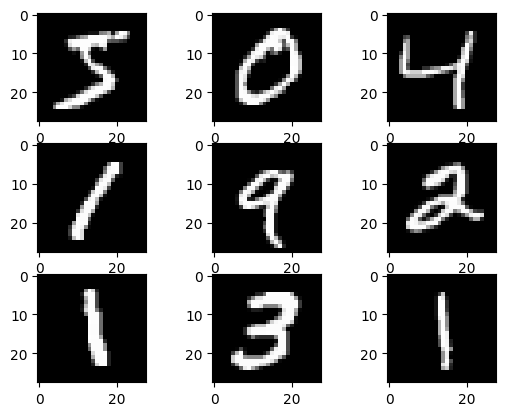

In [ ]:
for i in range (9):
    plt.subplot(3,3,i+1)
    plt.imshow(xtrain[i], cmap='gray')# plotting first 9 images

In [ ]:
print(xtrain[1])#checking image matrix

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

**Normalizing Benfits : Increases stability and performance of the model
here we used, Euclidean norm  Normalization**

In [ ]:
xtrain = ten.keras.utils.normalize(xtrain,axis = 1)
xtest = ten.keras.utils.normalize(xtest,axis = 1)

In [ ]:
print(xtrain[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
import numpy as np
imgsize =28
xtrain = np.array(xtrain).reshape(-1,imgsize,imgsize,1)# adding one channel to the image
xtest = np.array(xtest).reshape(-1,imgsize,imgsize,1)
print(xtrain.shape,xtest.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential#  allows you to create a neural network by stacking layers on top of each other in a linear fashion
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D

# **CONVOLUTION LAYER**


**output shape after convolution is : Input shape(pixel)-kernel size+stride**

In [ ]:
model = Sequential()

#1 layer
model.add(Conv2D(64,(3,3),strides=(1,1),padding ='valid',input_shape = xtrain.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#2 layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#3 layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#1 Fully connected layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

#2 Fully connected layer
model.add(Dense(32))
model.add(Activation('relu'))

#3 Fully connected layer
model.add(Dense(10))
model.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(len(xtrain))

60000


**calculating loss and accuracy**

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

**running the model for 5 epochs**

In [ ]:
training_history=model.fit(xtrain,ytrain,epochs=10,validation_split=0.3)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 66s 49ms/step - accuracy: 0.7722 - loss: 0.6955 - val_accuracy: 0.9649 - val_loss: 0.1159
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 63s 48ms/step - accuracy: 0.9634 - loss: 0.1202 - val_accuracy: 0.9621 - val_loss: 0.1212
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 63s 48ms/step - accuracy: 0.9762 - loss: 0.0768 - val_accuracy: 0.9726 - val_loss: 0.0923
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.9822 - loss: 0.0591 - val_accuracy: 0.9794 - val_loss: 0.0720
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.9850 - loss: 0.0498 - val_accuracy: 0.9756 - val_loss: 0.0855
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.9869 - loss: 0.0413 - val_accuracy: 0.9810 - val_loss: 0.0612
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.9896 - loss: 0.0320 - val_accuracy: 0.9821 - val_loss: 0.0595
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 63s 48ms/step - accuracy: 0.9919 -

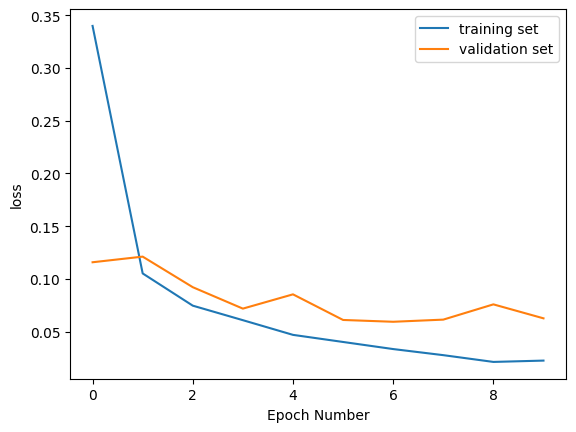

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

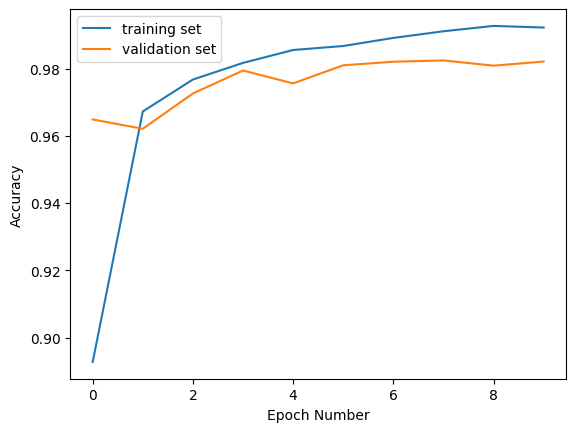

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

In [ ]:
#calculating accuracy and loss on test data
testloss,testacc = model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9800 - loss: 0.0759


In [ ]:
print("Loss on 10,000 test samples=",testloss)
print("Accuarcy on 10,000 test samples=",(testacc*100))

Loss on 10,000 test samples= 0.06099417060613632
Accuarcy on 10,000 test samples= 98.46000075340271


**making prediction on test data**

In [ ]:
prediction = model.predict([xtest])

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [ ]:
print(np.argmax(prediction[2]))

1


1


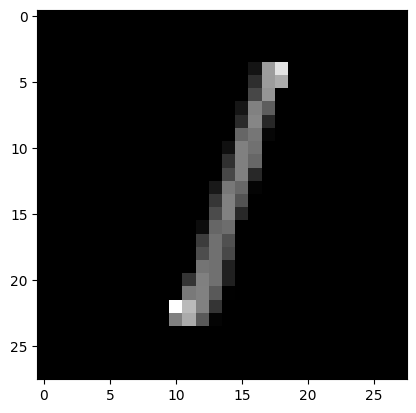

In [ ]:
print(ytest[2])
plt.imshow(xtest[2],cmap='gray')